# (1) High level statistics of the dataset :

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing libraries to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for 3D plot
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# Loading haberman.csv 
haberman = pd.read_csv("haberman.csv")

In [3]:
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


   '''Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of 
                            Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer
   
   Here columns are representing following information :-
   30  --> Age of patient at time of operation (numerical)  |||
   64  --> Patient's year of operation (year - 1900, numerical)  |||
   1   --> Number of positive axillary nodes detected (numerical)  |||
   1.1 --> Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year'''
   

In [4]:
# RENAMING the column names for our convenience as follows :
# Age  for  30
# Operation_Year  for  64
# axil_nodes  for  1
# Surv_status  for 1.1

haberman.columns = ['Age','Operation_Year','axil_nodes','Surv_status'];

In [5]:
haberman.head()

,Age,Operation_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
haberman.shape

(305, 4)

In [7]:
# (a) Number of points (observations) = 305
# (b) Number of features(Independent Variables)= 3 (They are Age , Operation_Year and axil_nodes( Number of axillary nodes))

haberman['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

In [8]:
#  (c) Number of classes = Two (They are : 1 = the patient survived 5 years or longer & 2 = the patient died within 5 year )
#  (d) Data-points per class --> 1 has 224 data-points  and 2 has 81 data-points

# (2) Explain our objective :

OBJECTIVE :- To predict whether the patients who had undergone surgery for breast cancer will die within 5 years or survive more than 5 years on the basis of given 3 features .

# (3) Perform Univariate Analysis (PDF, CDF, Boxplot, Violin plots) to         understand which features are useful towards classification .

# PDF

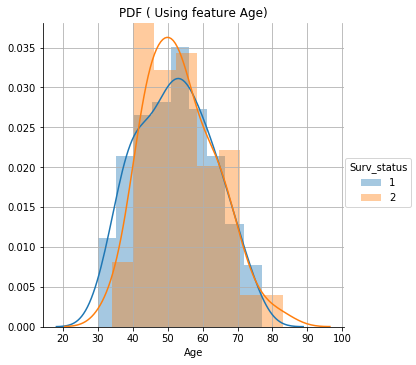

In [9]:
# PDF ( Using feature Age) :
sns.FacetGrid(haberman, hue="Surv_status", size=5).map(sns.distplot, "Age").add_legend();
plt.grid();
plt.title("PDF ( Using feature Age)");
plt.show();

OBSERVATION :- Here PDFs of both classes overlap around 90%-95% and have almost similar spread . So , Age alone is not useful for classifying survival status of patients .

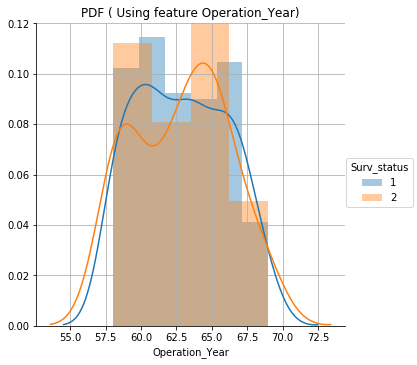

In [10]:
# PDF ( Using feature Operation_Year) :
sns.FacetGrid(haberman, hue="Surv_status", size=5).map(sns.distplot, "Operation_Year").add_legend();
plt.grid();
plt.title("PDF ( Using feature Operation_Year)");
plt.show();

OBSERVATION :- Here PDFs of both classes overlap around 90%-95% and have almost similar spread . So , Operation_Year alone is also not useful for classifying survival status of patients .

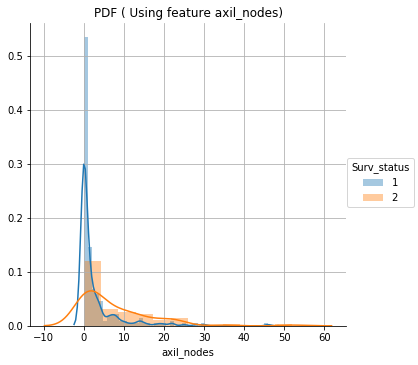

In [11]:
# PDF ( Using feature axil_nodes) :
sns.FacetGrid(haberman, hue="Surv_status", size=5).map(sns.distplot, "axil_nodes").add_legend();
plt.grid();
plt.title("PDF ( Using feature axil_nodes)")
plt.show();

OBSERVATION :- Here PDFs of both classes overlap around 80%-85% and both have maximum density between 0 to 10 with roughly similar spread . So , axil_nodes alone is not useful for classifying survival status of patients .

# CDF

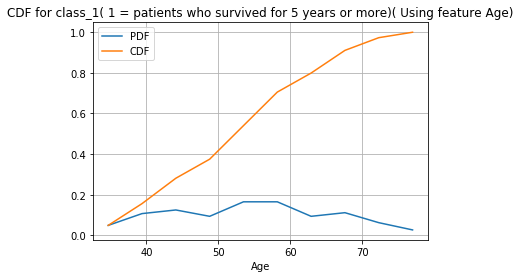

In [12]:
class_1 = haberman.loc[haberman["Surv_status"] == 1];
class_2 = haberman.loc[haberman["Surv_status"] == 2];

counts, bin_edges = np.histogram(class_1['Age'], bins=10, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF');
plt.grid();
plt.title("CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature Age)");
plt.xlabel("Age");
plt.legend();
plt.show();
# CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature Age) :

OBSERVATION :- Here patients with age between 50-60 have higher chances of survival and almost 95% patients who survived are less than or equal to age of 70 .

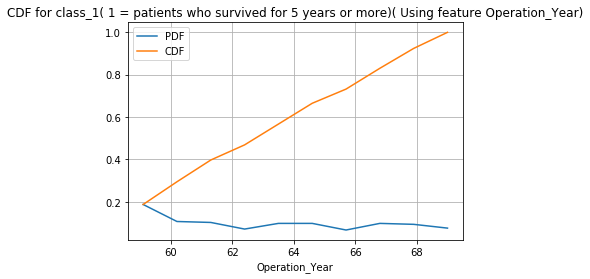

In [13]:
counts, bin_edges = np.histogram(class_1['Operation_Year'], bins=10, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF');
plt.grid();
plt.title("CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature Operation_Year)");
plt.xlabel("Operation_Year");
plt.legend();
plt.show();
# CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature Operation_Year) :

OBSERVATION :- Here around 62% patients survived who had undergone surgery before 1964 . The patients who had undergone surgery before 1960 have higher chances of survival .

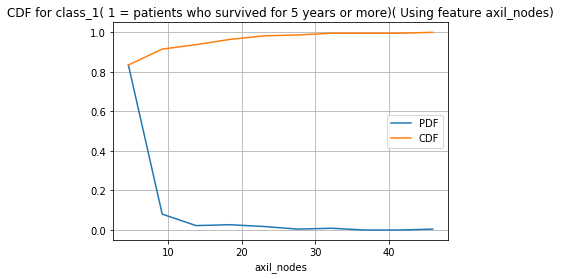

In [14]:
counts, bin_edges = np.histogram(class_1['axil_nodes'], bins=10, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF');
plt.grid();
plt.title("CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature axil_nodes)");
plt.legend();
plt.xlabel("axil_nodes");
plt.show();
# CDF for class_1( 1 = patients who survived for 5 years or more)( Using feature axil_nodes) :

ODSERVATION :- Here around 90% patients survived who have axil_nodes less than 10 . So, we can say the lower the number of axil_nodes , the higher the chances of survival of patients . Patients with 28 or more axil_nodes have around 1%-2% chances of survival .

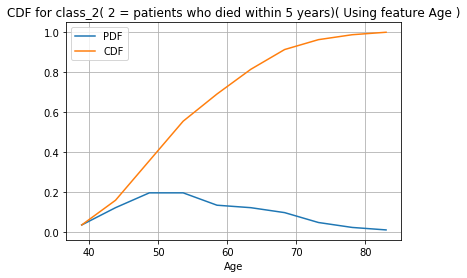

In [15]:
counts, bin_edges = np.histogram(class_2['Age'], bins=10, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF');
plt.title("CDF for class_2( 2 = patients who died within 5 years)( Using feature Age )");
plt.legend();
plt.xlabel("Age");
plt.grid();
plt.show();
# CDF for class_2( 2 = patients who died within 5 years)( Using feature Age ) :

OBSERVATION :- Here , the patients who had undergone surgery between age of 45 to 55 have lesser chances of survival . Almost 72% of patients who died within 5 years are less than or equal to the age of 60 years .

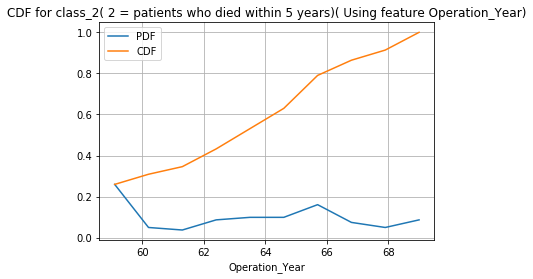

In [16]:
counts, bin_edges = np.histogram(class_2['Operation_Year'], bins=10, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF');
plt.grid();
plt.title("CDF for class_2( 2 = patients who died within 5 years)( Using feature Operation_Year)");
plt.legend();
plt.xlabel("Operation_Year");
plt.show();
# CDF for class_2( 2 = patients who died within 5 years)( Using feature Operation_Year) :

OBSERVATION :- Here , the patients who had undergone surgery before 1960 have lesser chances of survival and almost 80% of patients died within 5 years who had undergone surgery before 1966 .

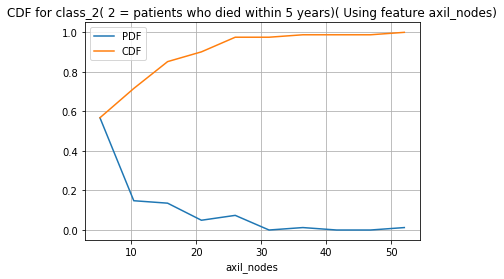

In [17]:
counts, bin_edges = np.histogram(class_2['axil_nodes'], bins=10, density = True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF');
plt.grid();
plt.title("CDF for class_2( 2 = patients who died within 5 years)( Using feature axil_nodes)");
plt.legend();
plt.xlabel("axil_nodes");
plt.show();
# CDF for class_2( 2 = patients who died within 5 years)( Using feature axil_nodes) :

OBSERVATION :- Here , around 70% of patients died within 5 years who have axil_nodes less than 10 . Almost 99% patients who died have axil_nodes less than 25 .

# Boxplot

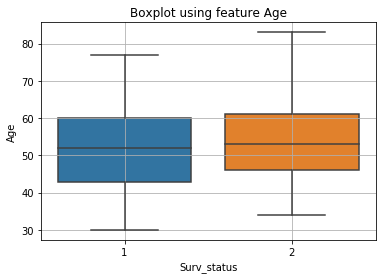

In [18]:
# Boxplot using feature Age :
sns.boxplot(x='Surv_status',y='Age', data=haberman);
plt.grid();
plt.title("Boxplot using feature Age");
plt.show();

OBSERVATION :- Here Box plot of both classes overlap around 95% and have almost similar spread with approximately same median . So , Age alone is not useful for classifying survival status of patients .

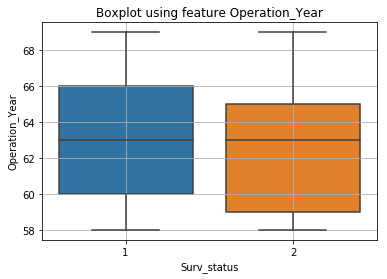

In [19]:
# Boxplot using feature Operation_Year :
sns.boxplot(x='Surv_status',y='Operation_Year', data=haberman);
plt.grid();
plt.title("Boxplot using feature Operation_Year");
plt.show();

OBSERVATION :- Here Box plot of both classes overlap around 85%-90% and have almost similar spread with approximately same median. So , Operation_Year alone is also not useful for classifying survival status of patients .

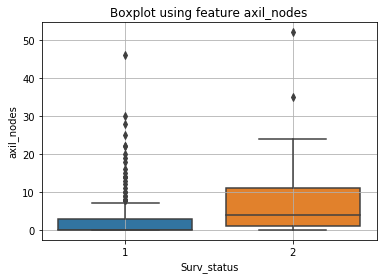

In [20]:
# Boxplot using feature axil_nodes :
sns.boxplot(x='Surv_status',y='axil_nodes', data=haberman);
plt.grid();
plt.title("Boxplot using feature axil_nodes");
plt.show();

OBSERVATION :- Here Box plot of both classes overlap around 80%-85% and both have maximum density between 0 to 10 with roughly similar spread . So , axil_nodes alone is not useful for classifying survival status of patients . Box plot of class 1 have many outliers . Around 50% patients who survived have axil nodes less than or equal to 4

# (4) Perform Bivariate Analysis (Scatter plots , Pair-plots) to see if combinations of features are useful in classification

# Scatter plot

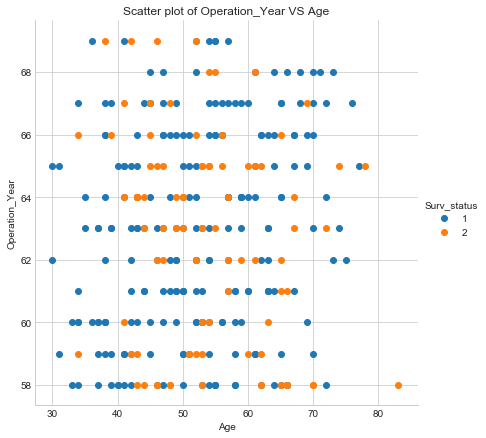

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=6).map(plt.scatter, "Age", "Operation_Year").add_legend();
plt.title("Scatter plot of Operation_Year VS Age");
plt.show();

OBSERVATION :- Here there is an overlap of around 85%-90% . So we can't classify survival of patients on the  basis of Age and Operation_Year .

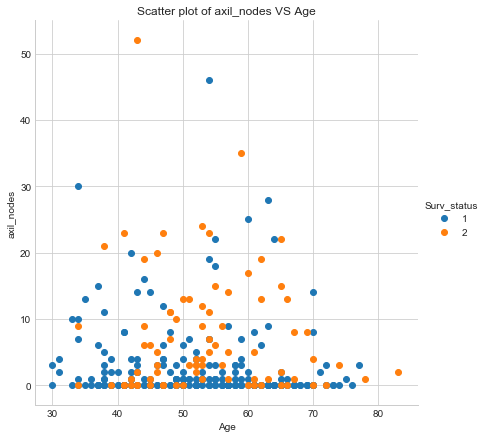

In [22]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=6).map(plt.scatter, "Age", "axil_nodes").add_legend();
plt.title("Scatter plot of axil_nodes VS Age");
plt.show();

OBSERVATION :- Here also there is an overlap of around 80%-85% . So we can't classify survival of patients on the basis of axil_nodes and Age .

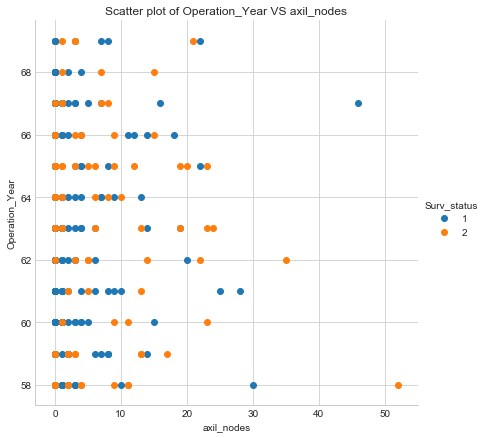

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=6).map(plt.scatter, "axil_nodes", "Operation_Year").add_legend();
plt.title("Scatter plot of Operation_Year VS axil_nodes")
plt.show();

OBSERVATION :- Here , there is an overlap of around 90%-95% . So , it is very difficult to classify the survival of patients who had undergone breast surgery on the basis of Operation_Year and axil_nodes .

# Pair-plot

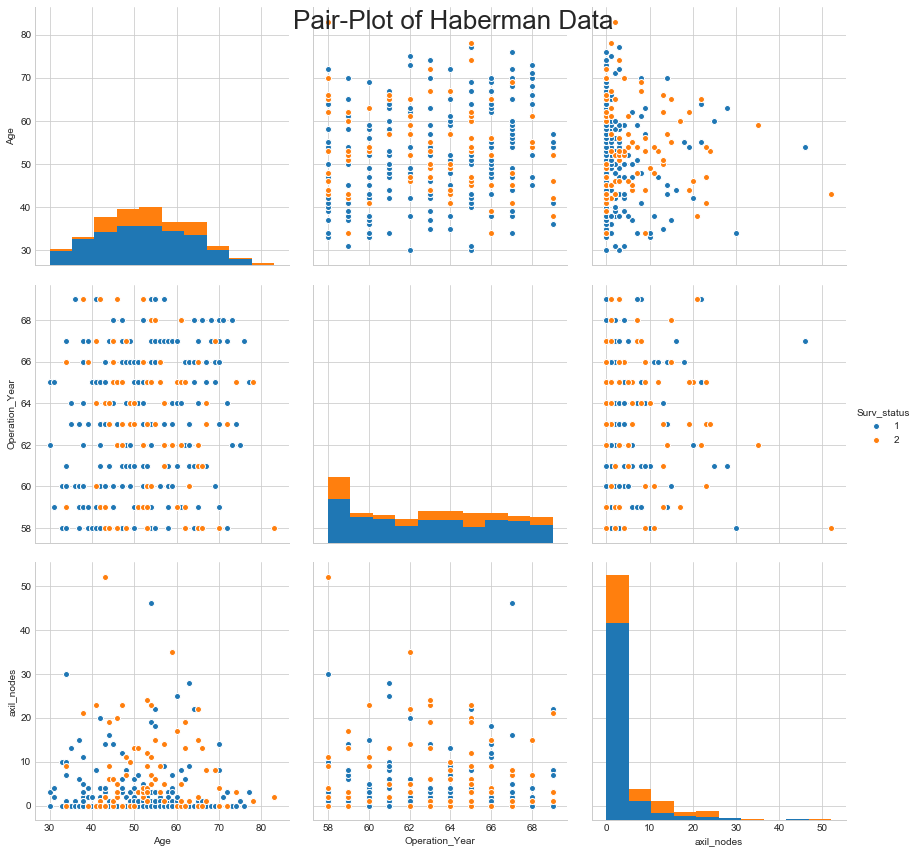

In [24]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status",x_vars =['Age','Operation_Year','axil_nodes'],y_vars =['Age','Operation_Year','axil_nodes'], size=4);
plt.suptitle("Pair-Plot of Haberman Data",size =26);
plt.show();

# (5) OBSERVATIONS :

(1). It is very difficult to predict the survival of the patients who had undergone surgery for breast cancer on the basis of these 3 features (i.e. Age, Operation_Year and axil_nodes) because both the classes (i.e. 1 and 2) are almost 85%-90% overlapping with each other .

(2). These two classes are linearly inseparable due to intense overlapping .



(3). We should collect more useful features which are helpful in predicting the survival of the patients who had undergone the surgery for breast cancer .

(4) . We need to use non-linear models then only we can predict survival of the patients .

(5). axil_nodes is around 20% more useful feature than Age and Operation_Year .

(6). Order of usefulness of features --> ( axil_nodes > Operation_Year > Age ).

# (6) 3D Plot

In [25]:
# x , y and z of class 1 ( 1 = patients who survived for 5 years or more)
x_1 = haberman.Age[haberman.Surv_status == 1]
y_1 = haberman.Operation_Year[haberman.Surv_status == 1]
z_1 = haberman.axil_nodes[haberman.Surv_status == 1]

In [26]:
# x , y and z of class 2 ( 2 = patients who died within 5 years)
x_2 = haberman.Age[haberman.Surv_status == 2]
y_2 = haberman.Operation_Year[haberman.Surv_status == 2]
z_2 = haberman.axil_nodes[haberman.Surv_status == 2]

In [27]:
# trace1 of class = 1
trace1 = go.Scatter3d(
    x=x_1,
    y=y_1,
    z=z_1,
    name = 'class 1 ( 1 = patients who survived for 5 years or more)',
    mode='markers',
    marker=dict(
        size=12,
        color='rgb(135,206,250)' ,# set color to an array/list of desired values
        symbol = 'circle'

    )
)

In [28]:
# trace2 of class = 2
trace2 = go.Scatter3d(
    x=x_2,
    y=y_2,
    z=z_2,
    name = 'class 2 ( 2 = patients who died within 5 years)',
    mode='markers',
    marker=dict(
        size=12,
        color='rgb(255,165,0)' ,# set color to an array/list of desired values
        symbol = 'circle'

    )
)

In [29]:
data = [trace1, trace2]
layout = go.Layout(
  
    title = "3D Plot Of Haberman Data",
    scene=dict(
    xaxis=dict(
        title='Age',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Operation_Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),  
    zaxis=dict(
        title='axil_nodes',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),), 
    
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30
   )
)

In [30]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='haberman-3d-scatter')

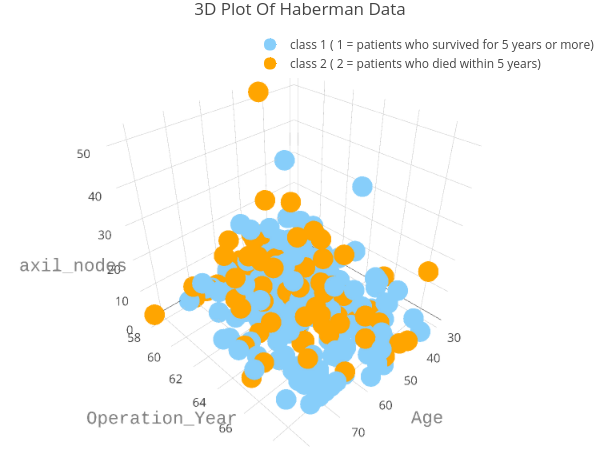

In [31]:
# Code to embed plotly image in the pdf format of this assignment
import plotly.plotly as py
py.image.ishow(fig, 'png',width='600',height='450')

 OBSERVATION :- We can clearly see in above 3D Plot that there is huge amount of overlap and it is very difficult to predict the survival of patients on the basis of these features i.e.(Age , Operation_Year and axil_nodes) . We can't find a plane which clearly divides this 3D space into two Half-spaces of two different classes . 